In [92]:
import pandas as pd

data_path = "../data"

product_df = pd.read_csv(f"{data_path}/data_products_id_tiny.csv")
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     31931 non-null  int64 
 1   image          31931 non-null  object
 2   name           31931 non-null  object
 3   shop_name      31931 non-null  object
 4   shopid         31931 non-null  int64 
 5   main_category  31931 non-null  object
 6   sub_category   31931 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [93]:
product_df['description'] = ""

In [94]:
import pandas as pd
from pathlib import Path

# Path to checkpoint folder
checkpoint_dir = Path("desc_checkpoints")
checkpoint_dir.mkdir(parents=True, exist_ok=True)

# Function to read .txt content by product_id
def load_txt_description(pid):
    path = checkpoint_dir / f"{pid}.txt"
    if path.exists():
        return path.read_text(encoding="utf-8").strip()
    return pd.NA

# Map the descriptions into the DataFrame
product_df["description"] = product_df["product_id"].map(load_txt_description)

In [95]:
product_df.to_csv("../data/data_products_id_tiny_with_desc.csv", index=False)

## Data Exploration

In [71]:
product_df

,product_id,image,name,shop_name,shopid,main_category,sub_category,description
0,19941741813,9cedf3c19821e83aa88a1e2f401e4e3b,Plac Poles sepatu Bersih Cream Pemutih Shoes S...,rejeki007,519630646,Sepatu Pria,Aksesoris & Perawatan Sepatu,Plac Poles Sepatu Bersih Cream adalah solusi p...
1,8609667001,94b8c7d8fabca08490e1398864a7e3d7,Bantalan Sepatu Depan / Insole (2pcs) - PR0015,Neofelis Houseware,113260191,Sepatu Wanita,Aksesoris & Perawatan Sepatu,Bantalan Sepatu Depan / Insole (2pcs) - PR0015...
2,845133903,882bfbef267af16d4a84624d1f33a885,MKL - Saddle Shoes / Shoee Tree Catokan Sepatu...,jakartakinesio,1317599,Sepatu Pria,Aksesoris & Perawatan Sepatu,**MKL - Saddle Shoes / Shoee Tree Catokan Sepa...
3,11448295634,2d16dcd0429f2c198fd3381d17696d5b,"ANTI JAMUR TAS KULIT DAUN TALAS ANTI AIR, LEAT...",Garael Official Store,526900249,Sepatu Pria,Aksesoris & Perawatan Sepatu,"**ANTI JAMUR TAS KULIT DAUN TALAS ANTI AIR, LE..."
4,12648185204,25eac0de61c8e0f0821daf72fb37f8c6,1 Pasang Insole Pad dan T-Shape Untuk Sepatu H...,Dishdash,14226667,Sepatu Wanita,Aksesoris & Perawatan Sepatu,Bikin pakai high heels jadi lebih nyaman sehar...
...,...,...,...,...,...,...,...,...
31926,8319206783,sg-11134201-22110-94zj010rwdkv93,SPEEDS Resistance Bands Tali Pembantu Fitness ...,CAHAYASTORE888,235433701,Olahraga & Outdoor,Yoga & Pilates,<NA>
31927,18440709211,1751fd2c7a26809c474fc53ddc2fe96c,Karet Pull Up Resistance Band Fitness Gym Late...,SportMoll,446317704,Olahraga & Outdoor,Yoga & Pilates,<NA>
31928,21726848050,ddda4b7866950ad892e17b1a8f18f050,SPEEDS Resistance Band 1 Set Yoga Band Loop Ba...,Speedsstore,184942443,Olahraga & Outdoor,Yoga & Pilates,<NA>
31929,12859437106,ac1b114802405545111f57855e7e6cf4,LIGHTSPEED RESISTANCE TUBE BAND / RESISTANCE 1...,Lightspeed Official Shop,478845512,Olahraga & Outdoor,Yoga & Pilates,<NA>


In [72]:
product_df["desc_len_char"] = product_df["description"].str.len()
product_df["desc_len_word"] = product_df["description"].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

In [73]:
print(product_df["desc_len_char"].mean())
print(product_df["desc_len_word"].mean())

869.3256061817212
14.581222009958974


In [74]:
product_df.duplicated(subset=["product_id"]).sum()

np.int64(0)

In [75]:
from collections import Counter
import re

all_words = " ".join(product_df["description"].dropna()).lower()
tokens = re.findall(r"\b\w+\b", all_words)

word_freq = Counter(tokens)
common_words = word_freq.most_common(20)
print("Most common words in descriptions:")
for word, freq in common_words:
    print(f"{word}: {freq}")

Most common words in descriptions:
dan: 18319
untuk: 12884
yang: 12529
dengan: 11941
ini: 6173
atau: 6041
cocok: 5167
mudah: 4195
dari: 3518
sekarang: 3261
di: 3156
dapatkan: 3127
nyaman: 3108
berbagai: 3075
tanpa: 2956
bahan: 2859
lebih: 2844
dalam: 2656
desain: 2602
berkualitas: 2587


In [76]:
product_df["category_in_desc"] = product_df.apply(
    lambda row: str(row["main_category"]).lower() in str(row["description"]).lower(), axis=1
)
print(product_df["category_in_desc"].mean())

0.01556481162506655


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dikaizm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


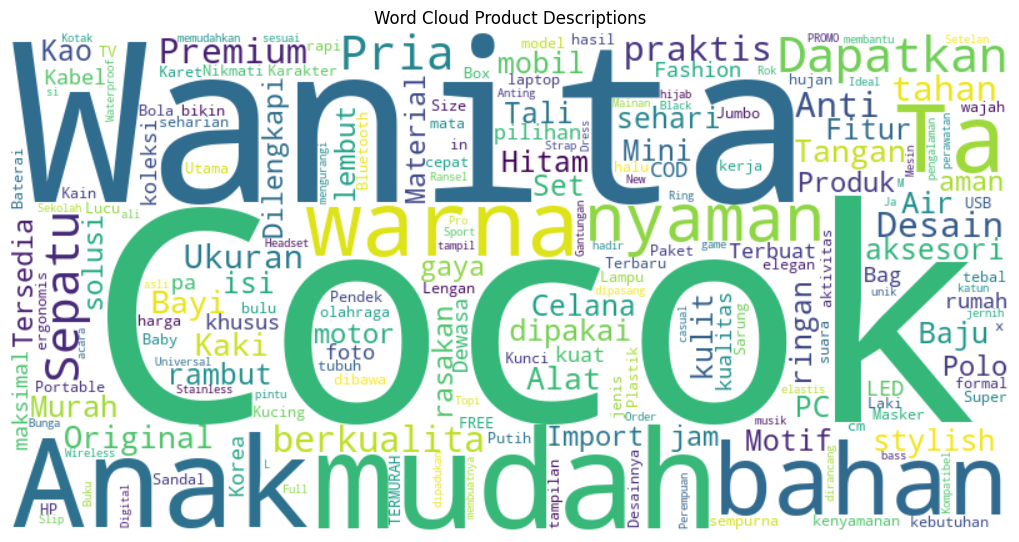

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

product_df["combined_text"] = product_df["name"].fillna("") + " " + product_df["description"].fillna("")

all_words = " ".join(product_df["combined_text"].dropna().astype(str))

stop_words = set(stopwords.words("indonesian"))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stop_words,
    max_words=200,
    collocations=False,
    contour_width=3
).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Product Descriptions")
plt.tight_layout(pad=0)
plt.show()

## Data Preprocessing

In [89]:
from sentence_transformers import SentenceTransformer
from langchain.vectorstores import FAISS
from langchain.schema import Document
from langchain.embeddings import HuggingFaceEmbeddings

# model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
model_name = "Hvare/Athena-indobert-finetuned-indonli-SentenceTransformer"

# Load model
model = SentenceTransformer(model_name)

# Convert text to document list
documents = [
    Document(
        page_content = (
            f"{row['name']}. {row['description']}. "
            f"Kategori: {row['main_category']} > {row['sub_category']}."
        ),
        metadata={
            "product_id": row["product_id"],
            "name": row["name"],
            "main_category": row["main_category"],
            "sub_category": row["sub_category"],
            "shop_name": row["shop_name"]
        }
    )
    for _, row in product_df.iterrows()
    if pd.notna(row["description"])
]

# Langchain wrapper for HF model
embedding_model = HuggingFaceEmbeddings(model_name=model_name)

# create FAISS index from document
vector_store = FAISS.from_documents(documents, embedding_model)

# Save index locally
vector_store.save_local("faiss_index")

In [90]:
# Load index
vectorstore = FAISS.load_local("faiss_index", embedding_model, allow_dangerous_deserialization=True)

query = "tas sekolah anak warna cerah"

results = vectorstore.similarity_search(query, k=10)
for doc in results:
    print(doc.metadata["name"], "\n", doc.page_content, "\n")
    print("==========================\n")

Tas Sepatu futsal Terbaru / Tas Sepatu Olahraga / Tas Ransel mini 10L / Tas Sekolah Anak Laki Laki 
 Tas Sepatu futsal Terbaru / Tas Sepatu Olahraga / Tas Ransel mini 10L / Tas Sekolah Anak Laki Laki. Tas sepatu futsal terbaru ini adalah solusi praktis untuk membawa sepatu olahraga dan perlengkapan lainnya. Dengan kapasitas 10L, tas ransel mini ini cukup luas untuk menampung sepatu, kaos kaki, botol minum, dan aksesoris olahraga lainnya. Desainnya yang stylish cocok untuk anak laki-laki maupun remaja, bisa dipakai ke sekolah, latihan, atau jalan-jalan.  

Tas ini dilengkapi kompartemen utama yang luas dan saku tambahan untuk menyimpan barang kecil. Bahan berkualitas membuatnya ringan namun kuat, sementara tali bahu yang nyaman memudahkan dibawa kemana saja. Tersedia dalam berbagai warna menarik, tas ini adalah pilihan sempurna untuk aktivitas sehari-hari atau olahraga favoritmu!  

Spesifikasi:  
- Kapasitas: 10L  
- Bahan: Polyester tahan air  
- Fitur: Kompartemen utama + saku tambah